In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("=== NURSE STRESS SENSOR DATA - EXPLORATORY DATA ANALYSIS ===\n")

=== NURSE STRESS SENSOR DATA - EXPLORATORY DATA ANALYSIS ===



In [2]:
# 1. DATA LOADING & INITIAL INSPECTION
print("1. DATA LOADING & INITIAL INSPECTION")
print("="*50)

df = pd.read_csv(r'C:\Users\Michi\nurse-stress-wearables\data\merged_data_subset.csv')

print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst few rows:")
df.head()

1. DATA LOADING & INITIAL INSPECTION
Dataset shape: (1964182, 9)
Memory usage: 347.76 MB

Column names: ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'id', 'datetime', 'label']

Data types:
X           float64
Y           float64
Z           float64
EDA         float64
HR          float64
TEMP        float64
id           object
datetime     object
label       float64
dtype: object

First few rows:


,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-61.0,17.0,-23.0,5.416230,71.35,33.77,83,2020-10-30 06:44:18.687500032,2.0
1,-60.0,17.0,-24.0,5.416230,71.35,33.77,83,2020-10-30 06:44:18.718749952,2.0
2,-57.0,18.0,-23.0,5.443141,71.35,33.77,83,2020-10-30 06:44:18.750000128,2.0
3,-58.0,19.0,-21.0,5.443141,71.35,33.77,83,2020-10-30 06:44:18.781250048,2.0
4,-56.0,21.0,-22.0,5.443141,71.35,33.77,83,2020-10-30 06:44:18.812499968,2.0


In [3]:
# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")
print(f"Unique rows: {df.shape[0] - df.duplicated().sum()}")


Duplicate rows: 0
Unique rows: 1964182



2. MISSING DATA ANALYSIS
          Missing Count  Missing Percentage
X                     0                 0.0
Y                     0                 0.0
Z                     0                 0.0
EDA                   0                 0.0
HR                    0                 0.0
TEMP                  0                 0.0
id                    0                 0.0
datetime              0                 0.0
label                 0                 0.0


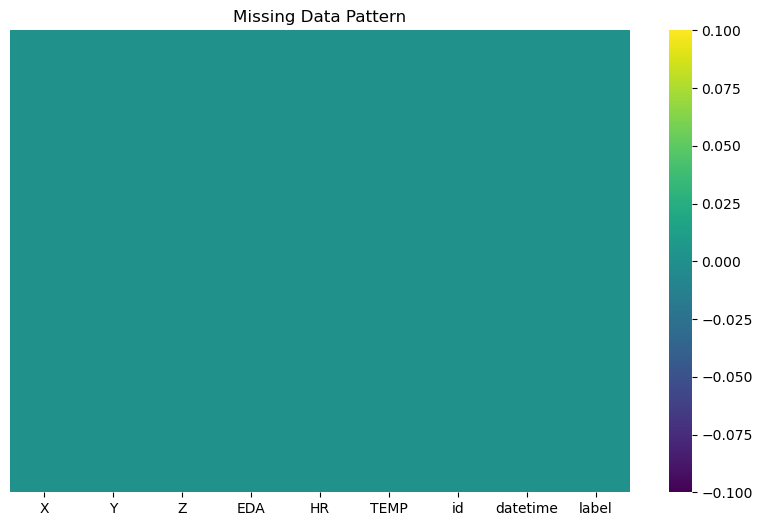

In [4]:
# 2. MISSING DATA ANALYSIS
print("\n2. MISSING DATA ANALYSIS")
print("="*30)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_summary)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Pattern')
plt.show()

In [5]:
# 3. TEMPORAL DATA HANDLING
print("\n3. TEMPORAL DATA HANDLING")
print("="*30)

# Convert datetime column
df['datetime'] = pd.to_datetime(df['datetime'])
print(f"DateTime range: {df['datetime'].min()} to {df['datetime'].max()}")
print(f"Total duration: {df['datetime'].max() - df['datetime'].min()}")

# Check sampling frequency
time_diffs = df['datetime'].diff().dropna()
print(f"\nSampling intervals (seconds):")
print(f"Mean: {time_diffs.dt.total_seconds().mean():.2f}")
print(f"Median: {time_diffs.dt.total_seconds().median():.2f}")
print(f"Mode: {time_diffs.dt.total_seconds().mode().iloc[0]:.2f}")

# Set datetime as index
df_temporal = df.set_index('datetime').copy()
print(f"\nData continuity check - gaps > 1 minute: {(time_diffs > pd.Timedelta('1min')).sum()}")


3. TEMPORAL DATA HANDLING
DateTime range: 2020-07-16 14:49:00 to 2020-12-13 08:01:00
Total duration: 149 days 17:12:00

Sampling intervals (seconds):
Mean: 1.89
Median: 0.03
Mode: 0.03

Data continuity check - gaps > 1 minute: 22



4. TARGET VARIABLE (STRESS LABELS) ANALYSIS
Label distribution:
label
2.0    1297937
0.0     666245
Name: count, dtype: int64

Label percentages:
label
2.0    66.08
0.0    33.92
Name: count, dtype: float64


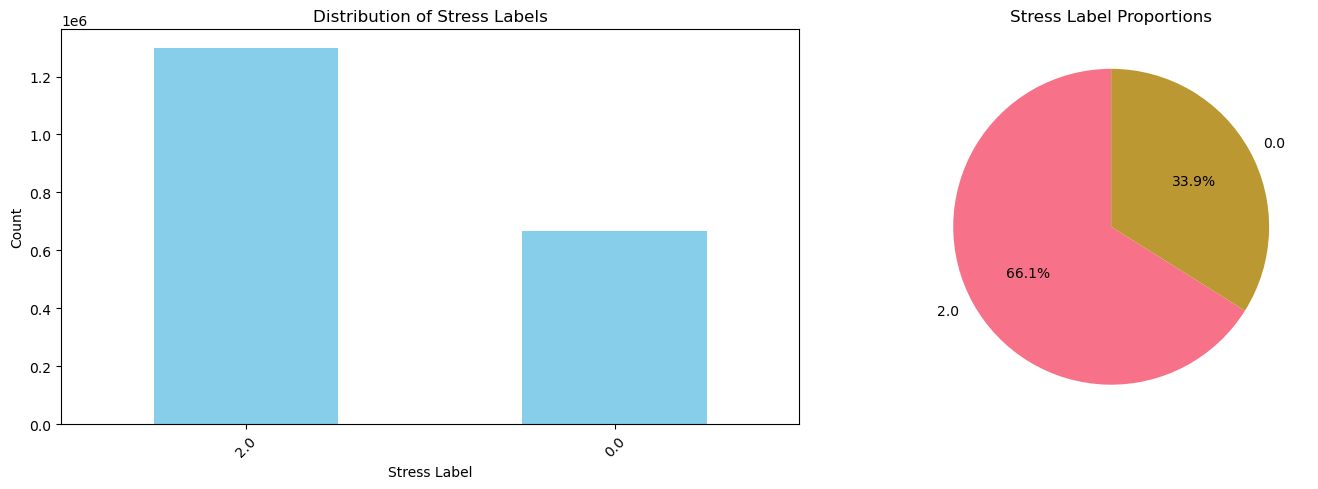

In [6]:
# 4. TARGET VARIABLE ANALYSIS
print("\n4. TARGET VARIABLE (STRESS LABELS) ANALYSIS")
print("="*45)

print("Label distribution:")
label_counts = df['label'].value_counts()
print(label_counts)
print(f"\nLabel percentages:")
print((label_counts / len(df) * 100).round(2))

# Visualize label distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
label_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Distribution of Stress Labels')
ax1.set_xlabel('Stress Label')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
ax2.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Stress Label Proportions')

plt.tight_layout()
plt.show()


5. SUBJECT-LEVEL ANALYSIS
Subject statistics:
    Record_Count                    Start_Time            End_Time  \
id                                                                   
83       1310720 2020-10-30 06:44:18.687500032 2020-12-13 08:01:00   
6D        591363 2020-07-16 14:49:00.000000000 2020-07-16 20:19:00   
83         62099 2020-10-30 06:25:00.000000000 2020-12-12 03:13:00   

             Label_Distribution  
id                               
83  {2.0: 1147516, 0.0: 163204}  
6D    {0.0: 503041, 2.0: 88322}  
83                 {2.0: 62099}  

Recording duration per subject (hours):
count       3.000000
mean      697.192714
std       599.192673
min         5.500000
25%       517.150000
50%      1028.800000
75%      1043.039071
max      1057.278142
Name: Duration_Hours, dtype: float64


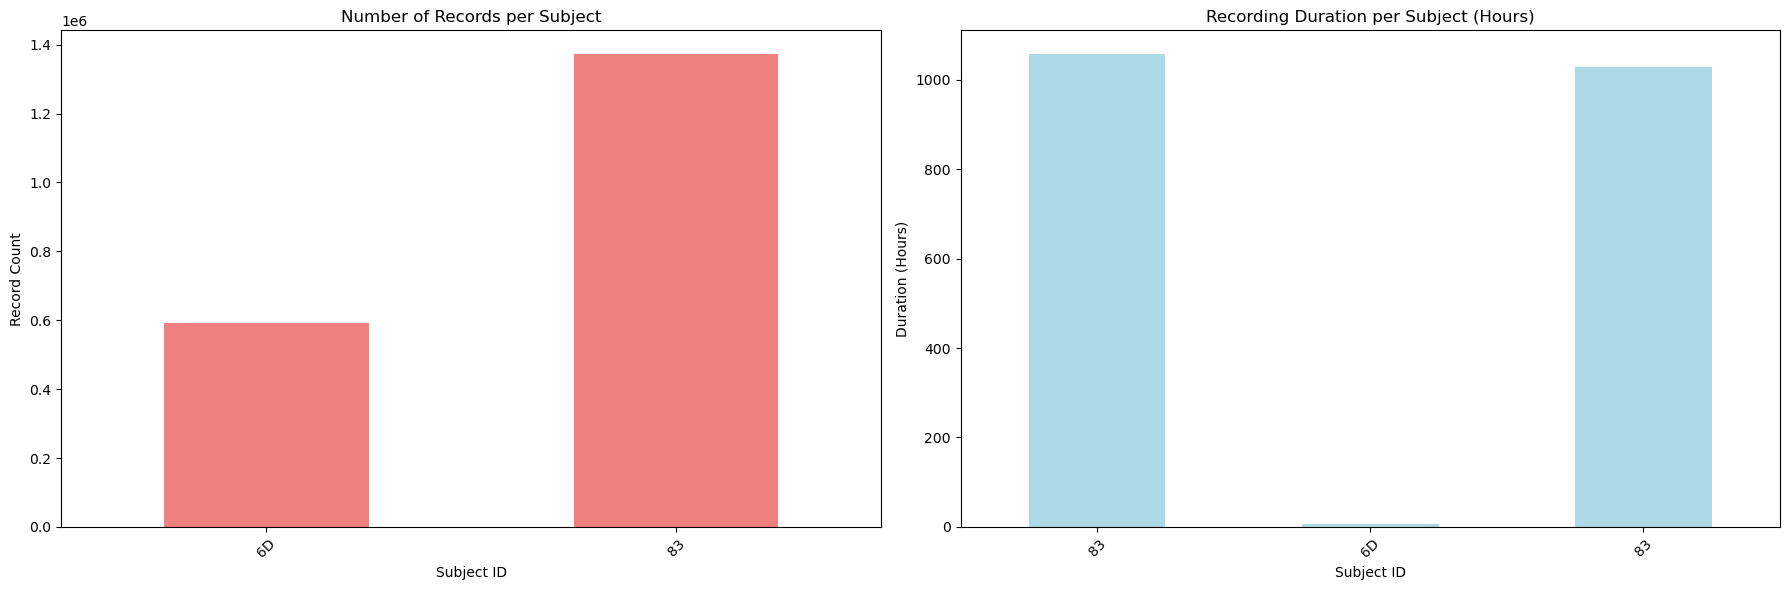


Stress label distribution by subject:
label    0.0     2.0
id                  
83     12.45   87.55
6D     85.06   14.94
83      0.00  100.00


<Figure size 1400x800 with 0 Axes>

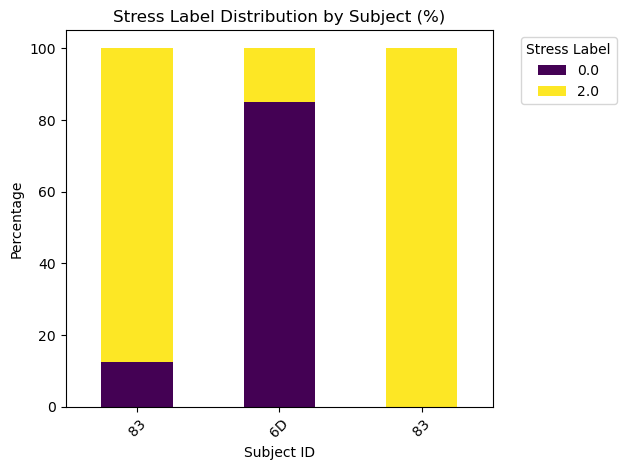

In [7]:
# 5. SUBJECT-LEVEL ANALYSIS
print("\n5. SUBJECT-LEVEL ANALYSIS")
print("="*30)

# Basic subject statistics (remove .round(2) which causes issues with mixed types)
subject_stats = df.groupby('id').agg({
    'datetime': ['count', 'min', 'max'],
    'label': lambda x: x.value_counts().to_dict()
})

subject_stats.columns = ['Record_Count', 'Start_Time', 'End_Time', 'Label_Distribution']
print("Subject statistics:")
print(subject_stats.head(10))

# Calculate recording duration per subject
subject_duration = df.groupby('id')['datetime'].agg(['min', 'max'])
subject_duration['Duration_Hours'] = (subject_duration['max'] - subject_duration['min']).dt.total_seconds() / 3600
print(f"\nRecording duration per subject (hours):")
print(subject_duration['Duration_Hours'].describe())

# Visualize data distribution across subjects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Records per subject - convert id to string for consistent sorting
subject_counts = df['id'].astype(str).value_counts().sort_index()
subject_counts.plot(kind='bar', color='lightcoral', ax=ax1)
ax1.set_title('Number of Records per Subject')
ax1.set_xlabel('Subject ID')
ax1.set_ylabel('Record Count')
ax1.tick_params(axis='x', rotation=45)

# Duration per subject
subject_duration['Duration_Hours'].plot(kind='bar', color='lightblue', ax=ax2)
ax2.set_title('Recording Duration per Subject (Hours)')
ax2.set_xlabel('Subject ID')
ax2.set_ylabel('Duration (Hours)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Label distribution across subjects
print(f"\nStress label distribution by subject:")
subject_label_dist = pd.crosstab(df['id'], df['label'], normalize='index') * 100
print(subject_label_dist.round(2))

# Visualize label distribution by subject
plt.figure(figsize=(14, 8))
subject_label_dist.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Stress Label Distribution by Subject (%)')
plt.xlabel('Subject ID')
plt.ylabel('Percentage')
plt.legend(title='Stress Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# 6. SENSOR DATA QUALITY ASSESSMENT
print("\n6. SENSOR DATA QUALITY ASSESSMENT")
print("="*40)

# Physiological signals analysis
physiological_cols = ['EDA', 'HR', 'TEMP']
orientation_cols = ['X', 'Y', 'Z']

print("Physiological signals summary:")
physio_stats = df[physiological_cols].describe()
print(physio_stats)

print("\nOrientation data summary:")
orient_stats = df[orientation_cols].describe()
print(orient_stats)

# Check for outliers using IQR method
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

print("\nOutlier detection (IQR method):")
for col in physiological_cols:
    outlier_count = detect_outliers(df, col)
    outlier_percent = (outlier_count / len(df)) * 100
    print(f"{col}: {outlier_count} outliers ({outlier_percent:.2f}%)")


6. SENSOR DATA QUALITY ASSESSMENT
Physiological signals summary:
                EDA            HR          TEMP
count  1.964182e+06  1.964182e+06  1.964182e+06
mean   3.050935e+00  8.555517e+01  3.295593e+01
std    3.829998e+00  1.218300e+01  2.217294e+00
min    0.000000e+00  5.307000e+01  2.739000e+01
25%    4.230550e-01  7.723000e+01  3.075000e+01
50%    1.799515e+00  8.378000e+01  3.395000e+01
75%    3.762137e+00  9.125000e+01  3.459000e+01
max    3.311553e+01  1.617700e+02  3.623000e+01

Orientation data summary:
                  X             Y             Z
count  1.964182e+06  1.964182e+06  1.964182e+06
mean  -3.518263e+01 -8.179222e+00  2.285559e+01
std    2.483820e+01  3.353887e+01  2.618218e+01
min   -1.280000e+02 -1.280000e+02 -1.280000e+02
25%   -5.600000e+01 -3.500000e+01  4.000000e+00
50%   -3.800000e+01 -2.000000e+00  2.100000e+01
75%   -1.900000e+01  1.100000e+01  4.600000e+01
max    1.270000e+02  1.270000e+02  1.270000e+02

Outlier detection (IQR method):
EDA: 16942

In [9]:
# 7. BASIC STATISTICAL SUMMARY
print("\n7. DETAILED STATISTICAL SUMMARY")
print("="*35)

# Overall statistics
print("Complete dataset statistics:")
print(df.describe(include='all'))

# Check for zero/negative values in physiological signals
print("\nPhysiological signal quality checks:")
for col in physiological_cols:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col}: {zero_count} zeros, {negative_count} negative values")


7. DETAILED STATISTICAL SUMMARY
Complete dataset statistics:
                   X             Y             Z           EDA            HR  \
count   1.964182e+06  1.964182e+06  1.964182e+06  1.964182e+06  1.964182e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean   -3.518263e+01 -8.179222e+00  2.285559e+01  3.050935e+00  8.555517e+01   
min    -1.280000e+02 -1.280000e+02 -1.280000e+02  0.000000e+00  5.307000e+01   
25%    -5.600000e+01 -3.500000e+01  4.000000e+00  4.230550e-01  7.723000e+01   
50%    -3.800000e+01 -2.000000e+00  2.100000e+01  1.799515e+00  8.378000e+01   
75%    -1.900000e+01  1.100000e+01  4.600000e+01  3.762137e+00  9.125000e+01   
max     1.270000e+02  1.270000e+02  1.270000e+02  3.311553e+01  1.617700e+02   
std     2.483820e+01  3.353887e+01  2.618218e+01  3.829998


8. SUBJECT-SPECIFIC VISUALIZATIONS
Subject stress levels:
    Total_Records  Stress_Records  Stress_Percentage
id                                                  
83          62099           62099             100.00
83        1310720         1147516              87.55
6D         591363           88322              14.94

Comparing Subject 83 vs Subject 6D
High stress subject: 6210 sampled points
Low stress subject: 59137 sampled points


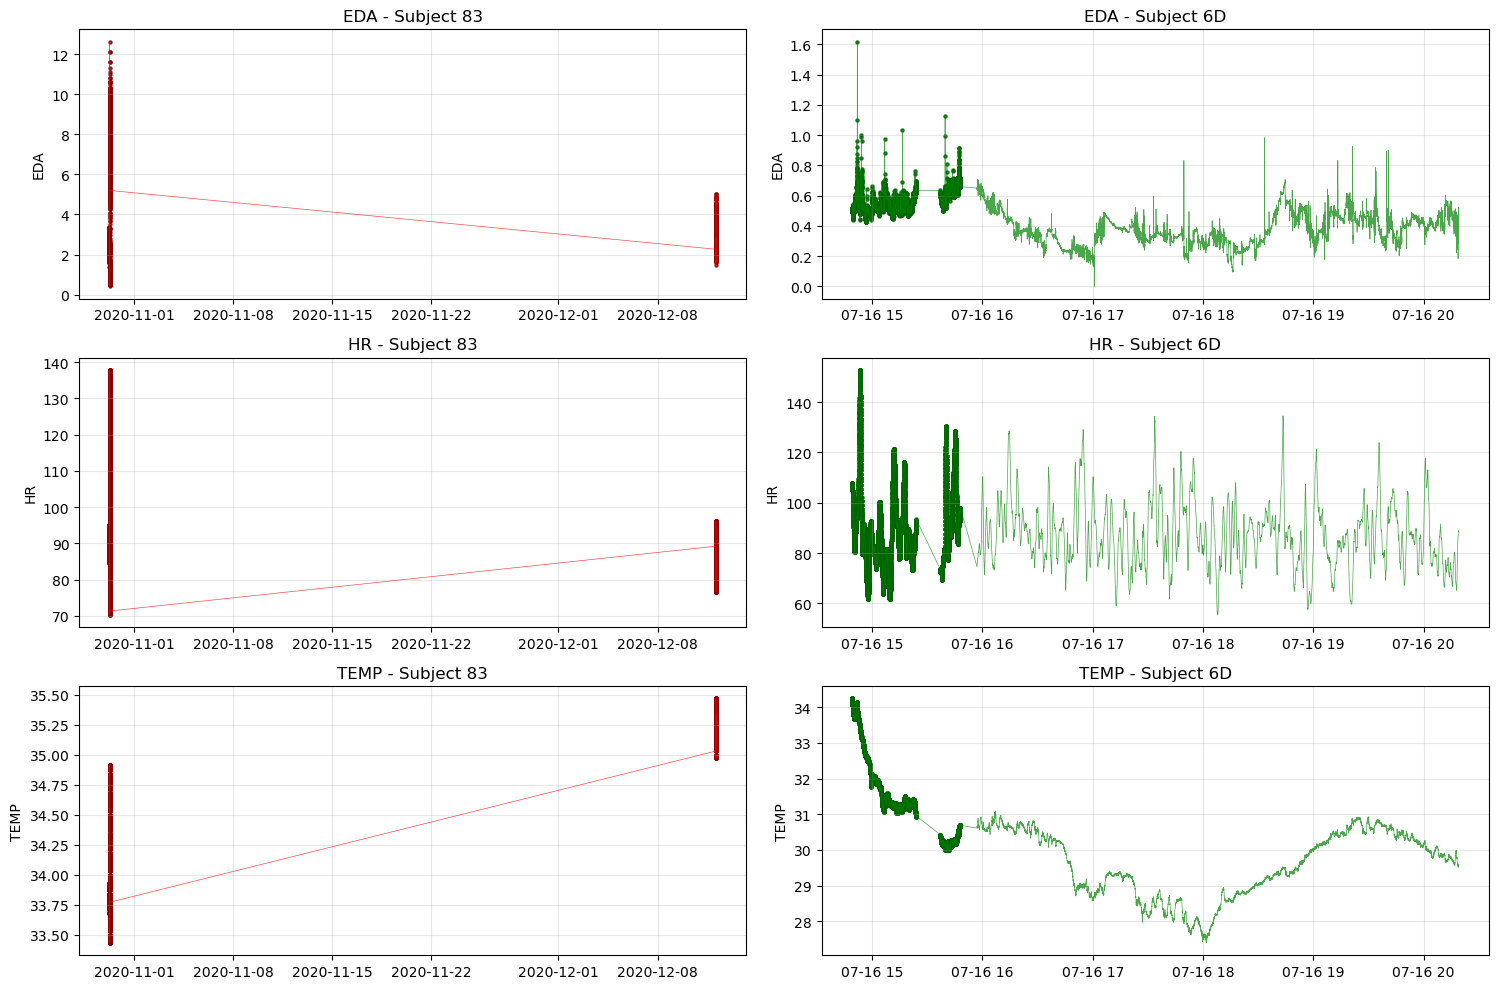


Statistical Comparison:
                  Subject_83  Subject_6D
Statistic Signal                        
mean      EDA           3.05        0.41
          HR           87.88       87.59
          TEMP         34.53       29.88
std       EDA           2.36        0.12
          HR           13.01       13.52
          TEMP          0.66        1.17

Stress vs Normal Analysis:

Subject 83:
Normal periods - HR: nan, EDA: nan
Stress periods - HR: 87.9, EDA: 3.045
Stress events: 62099

Subject 6D:
Normal periods - HR: 87.3, EDA: 0.378
Stress periods - HR: 89.5, EDA: 0.558
Stress events: 88322


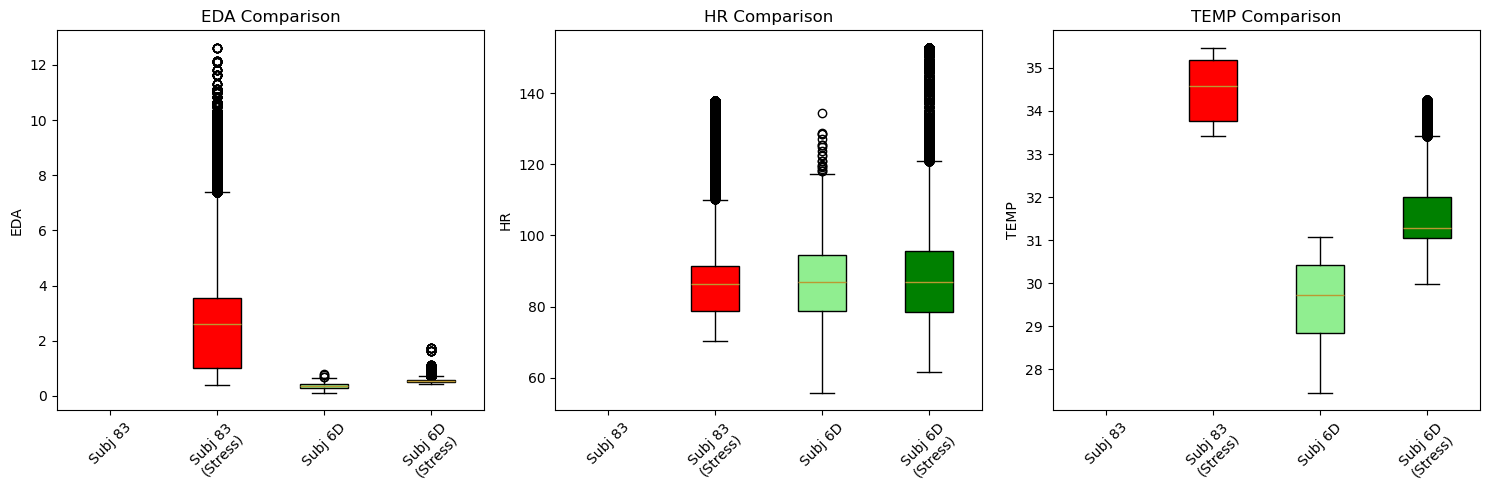


=== SIMPLE COMPARISON COMPLETE ===


In [12]:
# 8. SUBJECT-SPECIFIC VISUALIZATIONS
print("\n8. SUBJECT-SPECIFIC VISUALIZATIONS")
print("="*35)

# First, let's identify high-stress and low-stress subjects
subject_stress_summary = df.groupby('id')['label'].agg(['count', lambda x: (x != 0).sum()])
subject_stress_summary.columns = ['Total_Records', 'Stress_Records']
subject_stress_summary['Stress_Percentage'] = (subject_stress_summary['Stress_Records'] / subject_stress_summary['Total_Records'] * 100).round(2)
subject_stress_summary = subject_stress_summary.sort_values('Stress_Percentage', ascending=False)

print("Subject stress levels:")
print(subject_stress_summary)

# Select subjects for comparison
high_stress_subject = subject_stress_summary.index[0]
low_stress_subject = subject_stress_summary.index[-1]
print(f"\nComparing Subject {high_stress_subject} vs Subject {low_stress_subject}")

# Filter and sample data to reduce memory usage
high_stress_data = df[df['id'] == high_stress_subject].copy()
low_stress_data = df[df['id'] == low_stress_subject].copy()

# Sample data for visualization (every 10th point to reduce memory)
high_sample = high_stress_data.iloc[::10].copy()
low_sample = low_stress_data.iloc[::10].copy()

print(f"High stress subject: {len(high_sample)} sampled points")
print(f"Low stress subject: {len(low_sample)} sampled points")

# 1. Simple time series comparison with sampling
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

for i, col in enumerate(physiological_cols):
    # High stress subject
    axes[i, 0].plot(high_sample['datetime'], high_sample[col], 
                   color='red', alpha=0.7, linewidth=0.5)
    stress_events = high_sample[high_sample['label'] != 0]
    if len(stress_events) > 0:
        axes[i, 0].scatter(stress_events['datetime'], stress_events[col], 
                          color='darkred', s=5, alpha=0.8)
    axes[i, 0].set_title(f'{col} - Subject {high_stress_subject}')
    axes[i, 0].set_ylabel(col)
    axes[i, 0].grid(True, alpha=0.3)
    
    # Low stress subject
    axes[i, 1].plot(low_sample['datetime'], low_sample[col], 
                   color='green', alpha=0.7, linewidth=0.5)
    stress_events = low_sample[low_sample['label'] != 0]
    if len(stress_events) > 0:
        axes[i, 1].scatter(stress_events['datetime'], stress_events[col], 
                          color='darkgreen', s=5, alpha=0.8)
    axes[i, 1].set_title(f'{col} - Subject {low_stress_subject}')
    axes[i, 1].set_ylabel(col)
    axes[i, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Statistical comparison - simple approach
print("\nStatistical Comparison:")

def simple_comparison(data1, data2, subject1, subject2):
    # Get statistics for each dataset
    stats1 = data1[physiological_cols].describe().loc[['mean', 'std']]
    stats2 = data2[physiological_cols].describe().loc[['mean', 'std']]
    
    # Create comparison DataFrame with proper index
    stats = pd.DataFrame({
        f'Subject_{subject1}': stats1.values.flatten(),
        f'Subject_{subject2}': stats2.values.flatten()
    }, index=pd.MultiIndex.from_product([['mean', 'std'], physiological_cols], 
                                       names=['Statistic', 'Signal']))
    
    return stats.round(2)

comparison = simple_comparison(high_stress_data, low_stress_data, high_stress_subject, low_stress_subject)
print(comparison)

# 3. Stress vs Normal periods comparison - memory efficient
print("\nStress vs Normal Analysis:")

for subject_id, data in [(high_stress_subject, high_stress_data), (low_stress_subject, low_stress_data)]:
    stress_data = data[data['label'] != 0][physiological_cols]
    normal_data = data[data['label'] == 0][physiological_cols]
    
    if len(stress_data) > 0:
        print(f"\nSubject {subject_id}:")
        print(f"Normal periods - HR: {normal_data['HR'].mean():.1f}, EDA: {normal_data['EDA'].mean():.3f}")
        print(f"Stress periods - HR: {stress_data['HR'].mean():.1f}, EDA: {stress_data['EDA'].mean():.3f}")
        print(f"Stress events: {len(stress_data)}")

# 4. Simple box plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(physiological_cols):
    # Prepare data for box plots (sample if too large)
    high_normal = high_stress_data[high_stress_data['label'] == 0][col].dropna()
    high_stress_vals = high_stress_data[high_stress_data['label'] != 0][col].dropna()
    low_normal = low_stress_data[low_stress_data['label'] == 0][col].dropna()
    low_stress_vals = low_stress_data[low_stress_data['label'] != 0][col].dropna()
    
    # Sample if datasets are too large
    if len(high_normal) > 1000:
        high_normal = high_normal.sample(1000)
    if len(low_normal) > 1000:
        low_normal = low_normal.sample(1000)
    
    data_to_plot = [high_normal, low_normal]
    labels = [f'Subj {high_stress_subject}', f'Subj {low_stress_subject}']
    
    # Add stress data if available
    if len(high_stress_vals) > 0:
        data_to_plot.insert(1, high_stress_vals)
        labels.insert(1, f'Subj {high_stress_subject}\n(Stress)')
    if len(low_stress_vals) > 0:
        data_to_plot.append(low_stress_vals)
        labels.append(f'Subj {low_stress_subject}\n(Stress)')
    
    box_plot = axes[i].boxplot(data_to_plot, labels=labels, patch_artist=True)
    colors = ['lightcoral', 'red', 'lightgreen', 'green'][:len(box_plot['boxes'])]
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
    
    axes[i].set_title(f'{col} Comparison')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n=== SIMPLE COMPARISON COMPLETE ===")